Autor: Roman Janic Studer

# Aufgabenstellung 

**Aufgabenstellung:**
Die Kantonsstrasse unterhalb Schiers (GR) ist von Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Sie unterstützen den Kantonsingenieur in der Entscheidungsfindung und in der Kommunikation der Resultate an die Bevölkerung.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.0001 ist. Für die Berechnungen soll ein Code in Python oder R entwickelt werden. Es soll so strukturiert und dokumentiert werden, dass er in Zukunft ohne grosse Anpassungen für ähnliche Problemstellungen angewendet werden kann.

Neben den Berechnungen werden Sie für den Kanton die Kommunikation an die lokale Bevölkerung gestalten. Diese ist heikel, weil man es der Bevölkerung nicht recht machen kann: bleibt die Strasse offen, ist die Bevölkerung weiterhin verunsichert; schliesst man die Strasse, ist die Bevölkerung verärgert wegen der eingeschränkten Mobilität. So oder so: Sie müssen die Resultate umfangreich und klar kommunizieren und kontextualisieren, um die Bevölkerung für die Entscheidung des Kantonsingenieurs zu gewinnen. Die Form der Kommunikation ist Ihnen überlassen. Falls Sie sich für eine Homepage entscheiden, müssen Sie das Webhosting selbst organisieren, denn der Kanton war kürzlich von Hackerangriffen betroffen und hat keinen verfügbaren Server.

# Einführung

**Die folgende Liste gibt an in welchen Kapiteln die verschiedenen Kompetenzen angewandt wurden:**

(Gewisse Kompetenzen wurden auch in anderen Dokumenten als dieses Python-Notebook verwendet. Bitte betrachten Sie auch die anderen Dokumente in der Abgabe)

| Kapitel | wer | git | pgr | gdv | iko | ako | dko |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 3 |  |  | x |  |  |  |  |
| 4 |  |  | x |  |  |  |  |
| 5 |  |  | x | x |  |  |  |
| 6 | x |  | x |  |  |  |  |
| 7 | x |  | x | x |  |  |  |
| 8 |  | x | x |  | x | x | x |
| 9 |  |  | x |  |  |  |  |

**Einführung:**
In diesem Notebook werde ich die Daten der "Steinschlag-Challeng, HS19C4" untersuchen. Die Aufgabe dieses Projektes ist die Wahrscheinlichkeit eines Todes durch einen Steinschlag an einem Hang über einer Straße in Graubünden (Schweiz) zu berechnen. Die Challenge selbst finden Sie unter dem folgenden Link: [Steinschlag Challenge](https://ds-spaces.technik.fhnw.ch/steinschlag/)

Dieses Notebook wird verwendet, um die Daten in zahlreichen Plots zu visualisieren. Die Berechnung der Wahrscheinlichkeit erfolgt unter anderem in diesem Python-Notebook und in einem R Notebook. Die endgültigen Ergebnisse dieser Erkundung werden später auf einer Website veröffentlicht.

# Imports and Datasets
Es werden insgesamt fünf Datasets importiert.
Darunter die zwei Datasets mit Informationen zu den beiden Absturzstellen. Sie enthalten Masse, Geschwindigkeit und Energie von 100 Ereignissen über einen Zeitraum von drei Monaten.

In [1]:
from csv import reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
import scipy.stats as stats
from scipy.stats import expon, gamma, lognorm, dweibull
import pylab 
from rpy2.robjects import r
from rpy2.robjects.packages import importr
import random
import math

#open dataset 1,2 and traffic
out_1 = pd.read_csv("../data/out_1.csv", sep=';')
out_2 = pd.read_csv("../data/out_2.csv", sep=';')
traffic = pd.read_csv("../data/trafficdensity_per_hour.csv", sep=';')
pro_counter = pd.read_csv('../data/pro_counter.csv', sep=',')
sim_result = pd.read_csv('../data/monte_carlo_rockfall_100_simulations_1e+05_years.csv', sep=',');

# Daten bereinigen
#### 4.1 Dataset out_1
Das Dataset `out_1` enthält fünf Zeilen mit insgesamt 68 Einträgen. Jeder Eintrag beschreibt wann ein Ereigniss stattfand (Datum und Uhrzeit), sowie die Masse [kg], Geschwindigkeit [m/s] und kinetische Energie [kJ] des Ereignisses. 

In [2]:
out_1.head()

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Kin_Energy [kJ]
0,01.01.2019,09:00:00,194,8.4,6.84432
1,01.01.2019,21:00:00,224,8.8,8.67328
2,02.01.2019,14:00:00,3104,9.2,131.36128
3,04.01.2019,15:00:00,228,8.0,7.29600
4,05.01.2019,23:00:00,755,7.0,18.49750


In [3]:
out_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
Datum                    68 non-null object
Uhrzeit                  68 non-null object
Masse [kg]               68 non-null int64
Geschwindigkeit [m/s]    68 non-null float64
Kin_Energy [kJ]          68 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ KB


In [4]:
#Zeilen und Spalten löschen die NA Daten haben:
out_1_clean = out_1.dropna(how='any')
out_1_clean = out_1_clean.dropna(axis = 'columns')
out_1_clean.isna().sum()

Datum                    0
Uhrzeit                  0
Masse [kg]               0
Geschwindigkeit [m/s]    0
Kin_Energy [kJ]          0
dtype: int64

Das Datasets out_1 enthält einen Wert mit der Masse null. Entweder ist hier ein Rundungsfehler oder Messfehler entstanden. Da wir die Ursache für den Fehler nicht kennen und es sich nur um einen Wert handelt, haben wir uns dazu entschieden diese Zeile zu entfernen.

In [5]:
#Zeile mit Masse 0 löschen
out_1_clean = out_1_clean[out_1_clean['Masse [kg]'] != 0]

In [6]:
#Spalten umbenennen:
out_1_clean = out_1_clean.rename(columns= {'Datum':'Date',
                                             'Uhrzeit': 'Time',
                                             'Masse [kg]' : 'Mass in kg' ,
                                             'Geschwindigkeit [m/s]' : 'Speed in m/s',
                                             'Kin_Energy [kJ]' : 'Energy in kJ'
                                            })

#### 4.2 Dataset out_2
Das Dataset `out_2` enthält fünf Zeilen mit insgesamt 32 Einträgen. Jeder Eintrag beschreibt wann ein Ereigniss stattfand (Datum und Uhrzeit), sowie die Masse [kg], Geschwindigkeit [m/s] und kinetische Energie [kJ] des Ereignisses. 

In [7]:
out_2.head()

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Kin_Energy [kJ]
0,01.01.2019,09:00:00,38,45.4,39.16204
1,03.01.2019,06:00:00,187,41.6,161.80736
2,04.01.2019,10:00:00,36,44.6,35.80488
3,07.01.2019,14:00:00,6,41.2,5.09232
4,11.01.2019,06:00:00,65,39.6,50.96520


In [8]:
out_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
Datum                    32 non-null object
Uhrzeit                  32 non-null object
Masse [kg]               32 non-null int64
Geschwindigkeit [m/s]    32 non-null float64
Kin_Energy [kJ]          32 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
#Zeilen und Spalten löschen die NA Daten haben:
out_2_clean = out_2.dropna(how='any')
out_2_clean = out_2_clean.dropna(axis = 'columns')
out_2_clean.isna().sum()

Datum                    0
Uhrzeit                  0
Masse [kg]               0
Geschwindigkeit [m/s]    0
Kin_Energy [kJ]          0
dtype: int64

In [10]:
#Zeile mit Masse 0 löschen
out_2_clean = out_2_clean[out_2_clean['Masse [kg]'] != 0]

In [11]:
#Spalten umbenennen:
out_2_clean = out_2_clean.rename(columns= {'Datum':'Date',
                                             'Uhrzeit': 'Time',
                                             'Masse [kg]' : 'Mass in kg' ,
                                             'Geschwindigkeit [m/s]' : 'Speed in m/s',
                                             'Kin_Energy [kJ]' : 'Energy in kJ'
                                            })

#### 4.3 Dataset traffic
Das Dataset `traffic`ist vom Bundesamt für Statistik. Das Dataset hat 24 einträge für alle 24 Stunden im Tag und gibt die Verkehrsdichte in Prozent an.

In [12]:
traffic.head()

,hour,percentile
0,0,1.507968
1,1,0.712208
2,2,0.456835
3,3,0.421837
4,4,0.980265


In [13]:
#Summe der Spalte 'percentile' liegt bei 217 Prozent. Dies muss zuerst auf 100 Prozent skaliert werden.
print(traffic['percentile'].sum(), '%')

217.0795344 %


In [14]:
traffic['percentile'] = traffic['percentile']/2.170795344
print(traffic['percentile'].sum(), '%')

100.0 %


In [15]:
#zusammengeführtes dataset:
comb = [out_1_clean, out_2_clean]
rockfall = pd.concat(comb)

#99 Reihen da ein Event mit der Masse 0 gedroppt wurde
print(rockfall.shape)
rockfall.head()


(99, 5)


,Date,Time,Mass in kg,Speed in m/s,Energy in kJ
0,01.01.2019,09:00:00,194,8.4,6.84432
1,01.01.2019,21:00:00,224,8.8,8.67328
2,02.01.2019,14:00:00,3104,9.2,131.36128
3,04.01.2019,15:00:00,228,8.0,7.29600
4,05.01.2019,23:00:00,755,7.0,18.49750


In [16]:
#umformung der Zeit in datetime objekt
out_1_clean ['Time'] = pd.to_datetime (out_1_clean['Time']).dt.hour
out_2_clean ['Time'] = pd.to_datetime (out_2_clean['Time']).dt.hour
rockfall['Time'] = pd.to_datetime (rockfall['Time']).dt.hour

# Datenanalyse
Nach dem Einlesen der Datensätze werde ich nun mithilfe von Histogrammen erste Vermutungen über die Daten anstellen.

In [17]:
#statistische Daten über die Masse
print('out_1_clean:')
print(out_1_clean['Mass in kg'].describe(),'\n')
print('out_2_clean:')
print(out_2_clean['Mass in kg'].describe(),'\n')
print('rockfall:')
print(rockfall['Mass in kg'].describe())

out_1_clean:
count      68.000000
mean      628.632353
std       695.884703
min        12.000000
25%       214.750000
50%       402.500000
75%       773.000000
max      3104.000000
Name: Mass in kg, dtype: float64 

out_2_clean:
count     31.000000
mean     102.451613
std      104.178641
min        3.000000
25%       37.500000
50%       58.000000
75%      142.000000
max      406.000000
Name: Mass in kg, dtype: float64 

rockfall:
count      99.000000
mean      463.868687
std       628.133023
min         3.000000
25%        78.000000
50%       236.000000
75%       514.500000
max      3104.000000
Name: Mass in kg, dtype: float64


#### 5.1 Masse
Der folgende Code stellt ein Histogramm der Spalte "Masse" in unserem Datensatz dar. Hier sehen wir, dass die meisten der Felsen eine Masse von unter 500 kg haben. Das ist relevant, denn wir bräuchten mehr als vier Steine dieser Größe, um das Sicherheitsnetz zu durchbrechen. Betrachten wir unsere Daten sehen wir dass es nur an zwei Tagen zu so vielen Ereignissen kommt. (Die folgenden Histogramme werden mit dem gleichen Code dargestellt, nur mit anderen Variablen).

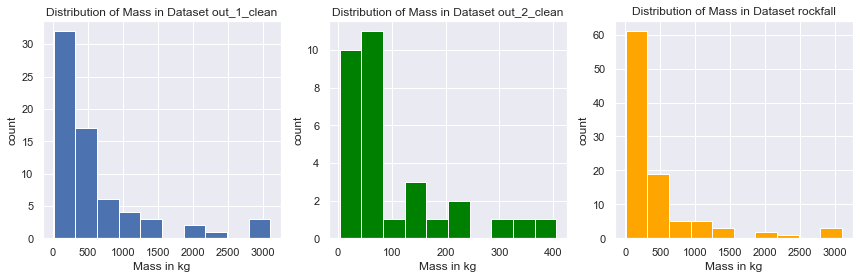

In [18]:
#1 Histogram out_1_clean, Mass
plt.subplot(1,3,1)
plt.hist(out_1_clean['Mass in kg'])
plt.title('Distribution of Mass in Dataset out_1_clean')
plt.xlabel('Mass in kg')
plt.ylabel('count')

#2 Histogram out_2_clean, Mass
plt.subplot(1,3,2)
plt.hist(out_2_clean['Mass in kg'], color = 'green')
plt.title('Distribution of Mass in Dataset out_2_clean')
plt.xlabel('Mass in kg')
plt.ylabel('count')

#3 Histogram rockfall, Mass
plt.subplot(1,3,3)
plt.hist(rockfall['Mass in kg'], color = 'orange')
plt.title('Distribution of Mass in Dataset rockfall')
plt.xlabel('Mass in kg')
plt.ylabel('count')

plt.subplots_adjust(right = 2)
plt.show()

#### 5.2 Geschwindigkeit
Hier sehen wir, dass wir eine maximale Geschwindigkeit von etwa 46 Metern pro Sekunde haben. Die Geschwindigkeit ist ebenfalls in zwei Gruppen unterteilt, was uns zeigt, dass sich die beiden Stellen, an denen Steinschläge auftreten, auf einer unterschiedlichen Höhe befinden. Später in diesem Notizbuch werde ich das Verhältnis von Masse und Geschwindigkeit aufzeigen.

In [19]:
#statistische Daten über die Geschwindigkeit
print('out_1_clean:')
print(out_1_clean['Speed in m/s'].describe(),'\n')
print('out_2_clean:')
print(out_2_clean['Speed in m/s'].describe(),'\n')
print('rockfall:')
print(rockfall['Speed in m/s'].describe())

out_1_clean:
count    68.000000
mean      8.788235
std       1.989189
min       3.600000
25%       7.300000
50%       8.800000
75%      10.125000
max      14.100000
Name: Speed in m/s, dtype: float64 

out_2_clean:
count    31.000000
mean     37.967742
std       5.389582
min      24.900000
25%      33.400000
50%      39.200000
75%      41.850000
max      46.500000
Name: Speed in m/s, dtype: float64 

rockfall:
count    99.000000
mean     17.925253
std      14.021218
min       3.600000
25%       8.350000
50%      10.000000
75%      32.700000
max      46.500000
Name: Speed in m/s, dtype: float64


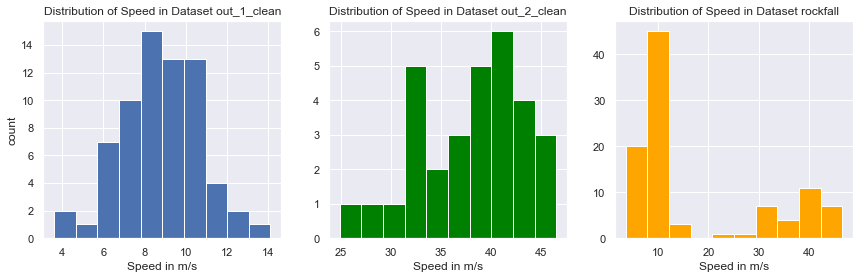

In [20]:
#1 Histogram out_1_clean, Speed
plt.subplot(1,3,1)
plt.hist(out_1_clean['Speed in m/s'])
plt.title('Distribution of Speed in Dataset out_1_clean')
plt.xlabel('Speed in m/s')
plt.ylabel('count')

#2 Histogram out_2_clean, Speed
plt.subplot(1,3,2)
plt.hist(out_2_clean['Speed in m/s'], color = 'green')
plt.title('Distribution of Speed in Dataset out_2_clean')
plt.xlabel('Speed in m/s')
plt.ylabel('')

#3 Histogram rockfall, Speed
plt.subplot(1,3,3)
plt.hist(rockfall['Speed in m/s'], color = 'orange')
plt.title('Distribution of Speed in Dataset rockfall')
plt.xlabel('Speed in m/s')
plt.ylabel('')

plt.subplots_adjust(right = 2)
plt.show()

#### 5.3 Energie
Wenn wir die Energie (in Kilojoule) grafisch darstellen, sehen wir , dass ein grosser Teil unserer Ereignisse eine sehr niedrige Energie besitzen und wir können sogar sehen, dass über 15 Steinschläge einen Wert von 0 auf der Grafik haben. Das liegt daran, dass wir mehrere Ereignisse haben, die eine Energie von >10kJ nicht erreichen.

In [21]:
#statistische Daten über die Energie
print('out_1_clean:')
print(out_1_clean['Energy in kJ'].describe(),'\n')
print('out_2_clean:')
print(out_2_clean['Energy in kJ'].describe(),'\n')
print('rockfall:')
print(rockfall['Energy in kJ'].describe())

out_1_clean:
count     68.000000
mean      25.197761
std       32.704933
min        0.464640
25%        8.214900
50%       12.815132
75%       23.135955
max      164.403200
Name: Energy in kJ, dtype: float64 

out_2_clean:
count     31.000000
mean      73.907845
std       88.551434
min        2.683935
25%       29.799717
50%       40.000000
75%       67.420560
max      394.796430
Name: Energy in kJ, dtype: float64 

rockfall:
count     99.000000
mean      40.450413
std       60.392076
min        0.464640
25%        9.725790
50%       19.062540
75%       46.970340
max      394.796430
Name: Energy in kJ, dtype: float64


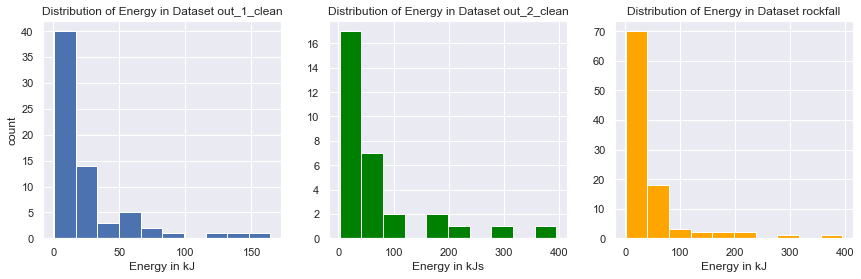

In [22]:
#1 Histogram out_1_clean, Energy
plt.subplot(1,3,1)
plt.hist(out_1_clean['Energy in kJ'], bins=10)
plt.title('Distribution of Energy in Dataset out_1_clean')
plt.xlabel('Energy in kJ')
plt.ylabel('count')


#2 Histogram out_2_clean, Energy
plt.subplot(1,3,2)
plt.hist(out_2_clean['Energy in kJ'], color = 'green')
plt.title('Distribution of Energy in Dataset out_2_clean')
plt.xlabel('Energy in kJs')
plt.ylabel('')


#3 Histogram rockfall, Energy
plt.subplot(1,3,3)
plt.hist(rockfall['Energy in kJ'], color = 'orange')
plt.title('Distribution of Energy in Dataset rockfall')
plt.xlabel('Energy in kJ')
plt.ylabel('')


plt.subplots_adjust(right = 2)
plt.show()

#### 5.4 Zeit
Sobald wir die Ereignisse nach der Stunde gruppieren, in der sie auftreten, sehen wir, dass wir gegen Mittag einen Anstieg der Steinschläge und nach dem Mittag einen Rückgang an Ereignissen haben. Die meisten Steine fallen um 12 Uhr. Da sowohl die Ereignisse und die Verkehrsdichte sich durch den Tag verändern, macht es Sinn den Verkehr in unsere Berechnungnen mit einzufliessen lassen. 

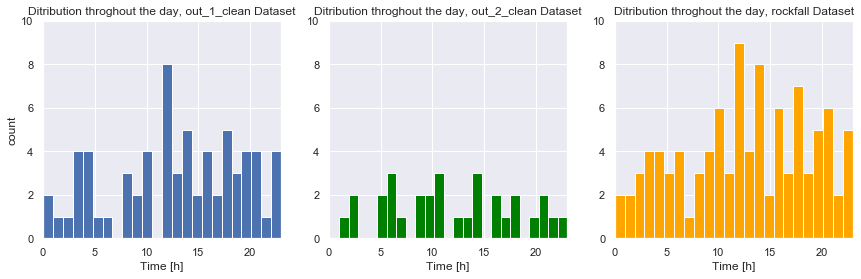

In [23]:
#Verteilung der Steinschläge auf Stunden
plt.subplot(1,3,1)
plt.hist(out_1_clean['Time'],bins=24)
plt.title('Ditribution throghout the day, out_1_clean Dataset')
plt.xlabel('Time [h]')
plt.ylabel('count')
plt.ylim((0,10))
plt.xlim((0,23))

plt.subplot(1,3,2)
plt.hist(out_2_clean['Time'],bins=24, color ='green')
plt.title('Ditribution throghout the day, out_2_clean Dataset')
plt.xlabel('Time [h]')
plt.ylabel('')
plt.ylim((0,10))
plt.xlim((0,23))

plt.subplot(1,3,3)
plt.hist(rockfall['Time'],bins=24, color = 'orange')
plt.title('Ditribution throghout the day, rockfall Dataset')
plt.xlabel('Time [h]')
plt.ylabel('')
plt.ylim((0,10))
plt.xlim((0,23))

plt.subplots_adjust(right = 2)
plt.show()

Zusätzlich zu den Histogrammen (oben) macht es Sinn die Verteilung der Ereignisse als *distribution plot* darstellen um die Verteilung der Ereignisse (vor allem um den Mittag) besser darzustellen.

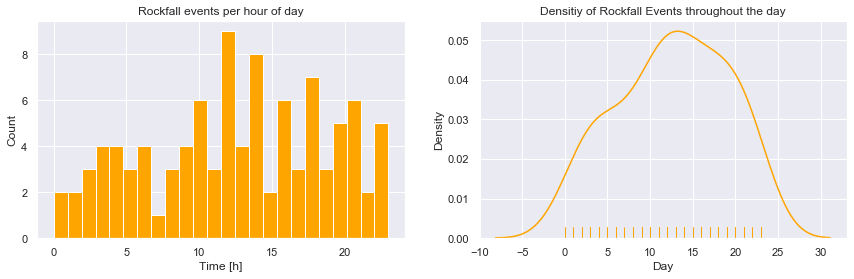

In [24]:
plt.subplot(1,2,1)
plt.hist(rockfall.Time, bins=24, color = 'orange')
plt.title('Rockfall events per hour of day')
plt.xlabel('Time [h]')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(rockfall['Time'], hist=False, rug=True, color='orange')

plt.title('Densitiy of Rockfall Events throughout the day')
plt.xlabel('Day')
plt.ylabel('Density')

plt.subplots_adjust(right=2)
plt.show()

#### 5.5 Irreführende Darstellung
Interessant ist, dass die Verknüpfung der beiden Datensätze zu einigen Fehlern in der Datenvisualisierung führen kann. Die ersten beiden Diagramme (unten) zeigen uns, in welchem Verhältnis Masse und Energie bei einem Steinschlag stehen. Was ziemlich linear zu sein scheint. Das macht bisher Sinn. Sobald wir die gleichen Variablen aus dem kombinierten Datensatz(`rockfall`) grafisch darstellen, erhalten wir eine Spitze bei etwa 300 bis 500 kg. Das sagt uns, dass die Gesteine der beiden Datensätze von verschiedenen Höhen fallen müssen. Denn nur eine höhere Geschwindigkeit in einem Datensatz würde den Anstieg der Energie zur selben Masse erklären.

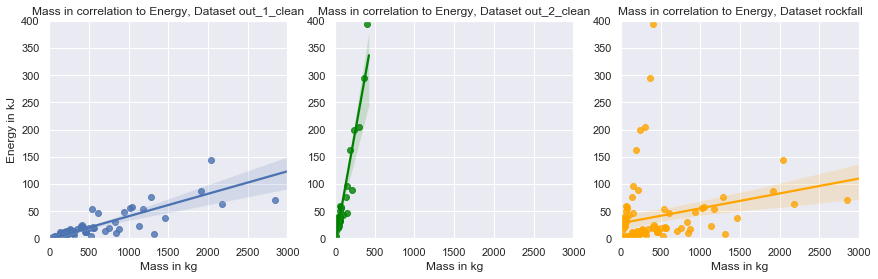

In [25]:
plt.subplot(1,3,1)
sns.regplot(x='Mass in kg', y='Energy in kJ',data=out_1_clean)
plt.title("Mass in correlation to Energy, Dataset out_1_clean")
plt.ylim((0,400))
plt.xlim((0,3000))

plt.subplot(1,3,2)
sns.regplot(x='Mass in kg', y='Energy in kJ',data=out_2_clean, color = 'green')
plt.title("Mass in correlation to Energy, Dataset out_2_clean")
plt.ylabel('')
plt.ylim((0,400))
plt.xlim((0,3000))

plt.subplot(1,3,3)
sns.regplot(x='Mass in kg', y='Energy in kJ',data=rockfall, color = 'orange')
plt.title("Mass in correlation to Energy, Dataset rockfall")
plt.ylabel('')
plt.ylim((0,400))
plt.xlim((0,3000))

plt.subplots_adjust(right=2)
plt.show()

Da wir zuvor die korrelation zwischen Energie und Masse geplottet haben, macht es Sinn nun auch noch einen Scatterplot mit allen drei Variablen zu erstellen. Der folgende Plot zeigt die korrelation zwischen Masse und Geschwindigkeit, wobei die Grösse und Farbe der Datenpunkte die jeweilige Energie beschreiben.

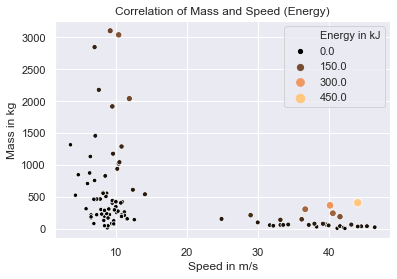

In [26]:
#Interessant wäre hier eine Linie einzuzeichnen die die maximale Energieaufnahme des Netzes anzeigt. 
#Diese Linie wäre allerdings weit über dem Plot
sns.scatterplot(rockfall['Speed in m/s'],rockfall['Mass in kg'], size=rockfall['Energy in kJ'], 
                hue = rockfall['Energy in kJ'], palette = 'copper')
plt.title('Correlation of Mass and Speed (Energy)')
plt.show()

#### 5.6 Verkehrsdichte pro Stunde
Die folgende Grafik zeigt die Verkehrsdichte auf Strassen in der Schweiz pro Stunde. Aus diesen Daten wird die Wahrscheinlichkeit eines Treffers in Kombination mit der Verkehrsdichte berechnet. Diese Daten stammen vom Schweizerischen Institut für Statistik aus dem Jahr 2015. Dieser Datensatz ist der Aktuellste des Institutes.

In [27]:
traffic.head()

,hour,percentile
0,0,0.694661
1,1,0.328086
2,2,0.210446
3,3,0.194323
4,4,0.451570


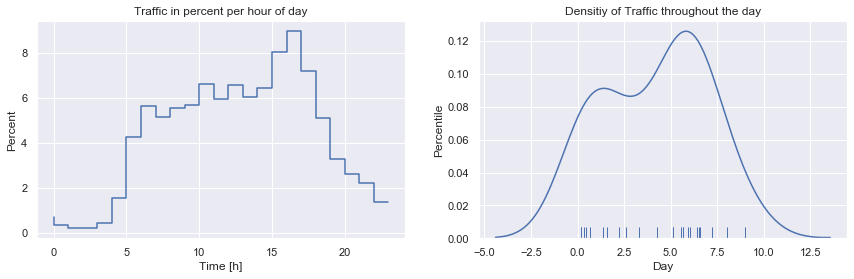

In [28]:
plt.subplot(1,2,1)
plt.step(traffic.hour,traffic.percentile)
plt.title('Traffic in percent per hour of day')
plt.xlabel('Time [h]')
plt.ylabel('Percent')

plt.subplot(1,2,2)
sns.distplot(traffic['percentile'], hist=False, rug=True)
plt.title('Densitiy of Traffic throughout the day')
plt.xlabel('Day')
plt.ylabel('Percentile')

plt.subplots_adjust(right=2)
plt.show()

#### 5.7 Verteilungen
Für die Monte-Carlo Simulation wurde die beste Verteilung für die verschiedenen Variablen im Datenset gesucht. Diese sind im R-Notebook nachzuschauen. 

**Dataset out_1:**
 - Geschwindigkeit: normal
 - Masse: lognormal
 
**Dataset out_2:**
- Geschwindigkeit: normal
- Masse: exponential

# Berechnung der Wahrscheinlichkeit

### 6.1 Wahrscheinlichkeit wird für den Fall eines Durchbruches innerhalb von 24 Stunden berechnet. 

Gegeben: 

- Stein bricht durch Netz
- Masse des Steins muss somit über 2 Tonnen sein
- Verkehrsaufkommen = 1200 Autos in 24 Stunden, ohne Stau und gleichmässige Verteilung durch den Tag.
- Geschwindigkeit = Alle Fahrzeugen fahren konstant 60 km/h, also 16.66 m/s
- Durchschnittliche Autodimensionen:
    - Länge = 4,4m
    - Breite = 1,8m 

Annahmen:

- Stein/Steine haben ein totales Volumen von mindestens 0,75 Kubikmeter
- Fahrzeug muss für das Eintreffen eines Todesfalles getroffen werden
    - Somit wird der Fall, dass ein Stein vor dem Auto auf der Strasse landet nicht beachtet. 
- Es kommt zum Todesfall, egal wo das Auto getroffen wird. 
- Höhe des Fahrzeuges wird nicht beachtet
- Geschwindigkeit des Steins wird nicht beachtet
- Breite des Steines liegt im Schnitt bei einem Meter

Hypothese: Es kommt zu einem Durchbruch und ein Fahrzeug kann von dem Stein getroffen werden

#### 6.1.1 Berchnung des Erwartungswertes pro Stunde das ein Steinschlag eintritt.

In [29]:
#erweitern der Traffic Liste mit einer neuen Kolonne für den Erwartungswert das ein Fahrzeug sich in Gefahr befindet
ev_per_hour = rockfall.groupby(rockfall.Time).count()
ev_per_hour = ev_per_hour[['Date']]
ev_per_hour = ev_per_hour.rename(columns = {'Date':'n_Events'}) #number of events at that hour

#Calculate expected Value of a rockfall at a certain hour
ev_per_hour['exp_val'] = ev_per_hour.n_Events / 0.99 / 100
ev_per_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 2 columns):
n_Events    24 non-null int64
exp_val     24 non-null float64
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [30]:
ev_per_hour.head()

,n_Events,exp_val
Time,,
0,2,0.020202
1,2,0.020202
2,3,0.030303
3,4,0.040404
4,4,0.040404


In [31]:
print('Summe exp_val:',ev_per_hour.exp_val.sum())
print('Summe Events:',ev_per_hour.n_Events.sum())

Summe exp_val: 1.0
Summe Events: 99


#### 6.1.2 Berechnung des Erwartungswertes pro Stunde dass sich ein Fahrzeug in der Aufprallzone des Steinschlags befindet.

#### 6.1.2.1 Totale Zeit in der sich ein Auto in der Aufprallzone des Stein befinden könnte:

In [32]:

#Zeit für das zurücklegen von 9.8m (2*länge Fahrzeug+ breite des Steins) mit einer Geschwindigkeit von 60km/h

speed = 60/3.6 #umwandlung von km/h in m/s

#Zeit ergibt sich durch die Formel Strecke/Geschwindigkeit
T_single_car = 9.8/speed
print("Zeit für die Strecke von 9,8 m:", T_single_car, "Sekunden")

#Totale Zeit für alle 1200 Fahrzeuge
T_car_total = T_single_car * 1200
print("Totale Zeit in der Fahrzeuge in der Gefahrenzone sind:", round(T_car_total,1), "Sekunden, oder", round(T_car_total/60,2), "Minuten")

Zeit für die Strecke von 9,8 m: 0.588 Sekunden
Totale Zeit in der Fahrzeuge in der Gefahrenzone sind: 705.6 Sekunden, oder 11.76 Minuten


Jetzt, da wir die Zeit haben, in der sich ein Auto in der "Gefahrenzone" befindet, können wir die Gesamtzeit (Sekunden in Stunde) berechnen, in der Autos Gefahr laufen, von einem Stein getroffen zu werden.
Dazu erstelle ich eine neue Liste mit dem Namen "car_per_hour", die die Gesamtzahl der durchfahrenden Autos, die Gesamtzeit der gefährdeten Autos und den Prozentsatz der Autos enthält, die zu dieser Zeit durch diese Zone fahren. 

Danach können wir den erwarteten Wert eines getroffenen Autos berechnen, indem wir den Erwartungswert, dass ein Stein um diese Zeit durch das Netz bricht, und den Erwartungswert, dass sich ein Auto um diese Zeit in der Gefahrenzone befindet, multiplizieren. 
Wir berechnen einen erwarteten Wert von 0.00888 oder 0,88% für dieses Ereignis.

#### 6.1.2.2 Wahrscheinlichkeit das ein Fahrzeug von einem Stein getroffen wird
(Unter der Voraussetzung das ein Stein innerhalb von 24 Stunden durch das Netz bricht)

In [33]:
car_per_hour = pd.DataFrame(traffic.percentile)
car_per_hour['cars_passing'] = car_per_hour.percentile * 12 #number of cars passing through in this hour
car_per_hour['t_in_danger'] = car_per_hour.cars_passing * 0.588 #total time that cars are in danger in this hour
car_per_hour['exp_value'] = car_per_hour.t_in_danger/3600 # expected value of cars beeing in danger in this hour 

car_per_hour.head()

,percentile,cars_passing,t_in_danger,exp_value
0,0.694661,8.335936,4.901530,0.001362
1,0.328086,3.937033,2.314976,0.000643
2,0.210446,2.525350,1.484906,0.000412
3,0.194323,2.331882,1.371146,0.000381
4,0.451570,5.418836,3.186275,0.000885


#### 6.1.3 Erwartungswert für einen Treffer pro Stunde

In [34]:
car_per_hour['total_exp_value'] = car_per_hour.exp_value * ev_per_hour.exp_val
car_per_hour.head()

,percentile,cars_passing,t_in_danger,exp_value,total_exp_value
0,0.694661,8.335936,4.901530,0.001362,0.000028
1,0.328086,3.937033,2.314976,0.000643,0.000013
2,0.210446,2.525350,1.484906,0.000412,0.000012
3,0.194323,2.331882,1.371146,0.000381,0.000015
4,0.451570,5.418836,3.186275,0.000885,0.000036


#### 6.1.4 Plotten der Erwartungswerte als visueller Vergleich

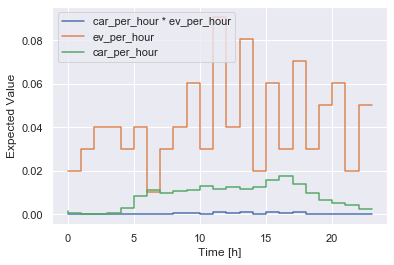

In [35]:
plt.step(x = car_per_hour.index, y = car_per_hour.total_exp_value,  label='car_per_hour * ev_per_hour')
plt.step(x = ev_per_hour.index, y = ev_per_hour.exp_val, label='ev_per_hour')
plt.step(x = car_per_hour.index, y = car_per_hour.exp_value, label='car_per_hour')
plt.xlabel('Time [h]')
plt.ylabel('Expected Value')
plt.legend()
plt.show()

**Lesebeschreibung**: Die blaue Linie in der Grafik zeigt den Erwartungswert eines Durchbruches pro Stunde an. Der maximale Erwartungwert liegt hier bei 0.1 um 12 Uhr. Die orange Linie gibt gibt widerum stündlich den Erwartungswert an dass ein Auto zur selben Zeit eines Steinschlages in der Gefahrenzone ist. Verrechnet man diese Werte ergibt sich daraus der Erwartungswert eines Treffers (grüne Linie).


In [36]:
print("Totaler Erwartungswert durch den Tag unter der Annahme das ein Stein durchs Netz bricht:", sum(round(car_per_hour.total_exp_value, 5)))

Totaler Erwartungswert durch den Tag unter der Annahme das ein Stein durchs Netz bricht: 0.00888


# Monte-Carlo Simulation

In [37]:
#list with expected value for cars per hour (index equals hour in day, 0-24h:
total_in_danger = car_per_hour['exp_value']
total_in_danger = pd.DataFrame(total_in_danger)
total_in_danger.head()

,exp_value
0,0.001362
1,0.000643
2,0.000412
3,0.000381
4,0.000885


**Beschreibung der Monte-Carlo-Simulation**

Die Monte-Carlo Simulation besteht aus mehreren Funktionen:
- `rock_event`: Nimmt eine random generierte Geschwindigkeit und Masse und testet ob das Netz bricht. Zusätzlich wird hier auch die bereits im Netz liegende Masse in den Test aufgenommen.
- `net_clearing_process`: Entleert das Netz alle 24 Stunden zu einer festgelegten Zeit
- `car_hitting`: Im Falle eines Durchbruches (wenn die Funktion `rock_event` einen Druchbruch meldet) testet diese Funktion ob ein Fahrzueg getroffen wird. 
- `monte_carlo_rockfall`: Verwaltet die Simulation und berechnet unter anderem random generierte Werte für Masse und Geschwindigkeit bei einem Ereignis.

In [38]:
year_hours = 8760
num_of_simulations = 100
num_of_failures = 0
mass_in_net = 0

def rock_event(speed,mass):
    global mass_in_net, num_of_failures
    broken = False
    energy = (0.5 * mass * (speed**2)) / 1000
    if energy >= 1000:
        broken = True
    elif energy >= 500:
        if mass_in_net >= 2000:
            broken = True
    if broken:
        num_of_failures += 1
    
    mass_in_net += mass
    return broken

def net_clearing_process(now, event_time_delta, clearing_time_minute, day_minutes):
    global mass_in_net
    current_time = now % day_minutes
    event_time = current_time + event_time_delta
    if current_time < clearing_time_minute:
        if event_time >= clearing_time_minute:
            mass_in_net = 0
    else:
        if event_time >= (day_minutes + clearing_time_minute):
            mass_in_net = 0

def car_hitting(event_time, day_minutes):
    global car_hit_stat, car_hit_even, car_hit_max
    current_time = event_time % day_minutes
    current_hour = (current_time / 60)
    current_hour = math.floor(current_hour)
    hit_number = random.random()
    
    if hit_number <= total_in_danger.exp_value[current_hour]:
        car_hit_stat += 1
    if hit_number <= 0.008166:
        car_hit_even += 1
    if hit_number <= 0.0175843437:
        car_hit_max += 1
    
def monte_carlo_rockfall(num_of_simulations, clearing_time_hour):
    global mass_in_net
    day_minutes = 24 * 60
    year_minutes = day_minutes * 365
    clearing_time_minute = clearing_time_hour * 60
    
    for simulation in range(1,num_of_simulations):
        mass_in_net = 0
        now = 0
        time_to_next_event_out_1 = 3732
        time_to_next_event_out_2 = 3892
        while now < year_minutes:
            if time_to_next_event_out_1<time_to_next_event_out_2:
                net_clearing_process(now, time_to_next_event_out_1, clearing_time_minute, day_minutes)
                time_to_next_event_out_2 = time_to_next_event_out_2-time_to_next_event_out_1
                now += time_to_next_event_out_1
                time_to_next_event_out_1 = 3746
                speed_1 = np.random.normal(loc=8.788235, scale=1.974509 , size=1)
                mass_1 = np.random.lognormal(mean=5.944893, sigma=1.045295, size=1)
                broken = rock_event(speed_1,mass_1)
                if broken:
                    car_hitting(now, day_minutes)
                    break
            else:
                net_clearing_process(now,time_to_next_event_out_2, clearing_time_minute, day_minutes)
                time_to_next_event_out_1 = time_to_next_event_out_1-time_to_next_event_out_2
                now += time_to_next_event_out_2
                time_to_next_event_out_2 = 3864
                speed_2 = np.random.normal(loc=37.79062,scale=5.3108,size=1)
                mass_2 = np.random.exponential(scale=1/0.0100724 ,size=1)
                broken = rock_event(speed_2, mass_2)
                if broken:
                    car_hitting(now, day_minutes)
                    break
            
    prob = num_of_failures/num_of_simulations
    print('probability:', prob)
    print('failures: ', num_of_failures)
    print('car hit stat:', car_hit_stat, '(Calculated with traffic data of the swiss institute of statistics)')
    print('car hit even:', car_hit_even, '(Calculated with an evenly distributed traffic)')
    print('car hit max:', car_hit_max, '(Calculated with maximum traffic at all times)')
    
car_hit_stat = 0
car_hit_even = 0
car_hit_max = 0
num_of_failures = 0
mass_in_net = 0                     

In [39]:
monte_carlo_rockfall(num_of_simulations=3000, clearing_time_hour = 8)

probability: 0.021
failures:  63
car hit stat: 0 (Calculated with traffic data of the swiss institute of statistics)
car hit even: 0 (Calculated with an evenly distributed traffic)
car hit max: 0 (Calculated with maximum traffic at all times)


#### 7.1 Auswertung der Simulation
Die Simulation wurde auf einem Server (SWITCH Engine) 100 Mal mit 100.000 Jahren durchgeführt. Die Ergebnise sind in den CSV's 'sim_result' und 'pro_counter' dokumentiert.

#### Result Table

`simulation_id` &rarr; 1 - 100 Simulation von 100,000 Einjahresdurchläufen

`num_rock_through_net` &rarr; Anzahl Ereignisse die durch das Netz brechen

`prob_rock_through_net_mc` &rarr; $P(S \geq 1)$

`car_hit_stat` &rarr; Anzahl der Autotreffer in einer Simulation unter Berücksichtigung der Tageszeit des Durchbruchs und der Tagesverkehrsdichtestatistik des BfS

`prob_car_hit_stat_mc` &rarr; $P(B = 1)$ wobei $B =$ 'car hit during one year' unter Berücksichtigung von `car_hit_stat`

`car_hit_even` &rarr; Anzahl der Autotreffer in einer Simulation unter der Annahme, dass die Verkehrsdichte gleichmäßig verteilt ist.

`prob_car_hit_even_mc` &rarr; $P(E = 1)$ wobei $e =$ 'car hit during one year' unter Berücksichtigung von `car_hit_even`

`car_hit_max` &rarr; Anzahl der Autotreffer in einer Simulation unter der Annahme, dass die maximale Verkehrsdichte unter Berücksichtigung der Statistiken des BfS erreicht wird.

`prob_car_hit_max_mc` &rarr; $P(M = 1)$ wobei $m =$ 'car hit during one year' unter Berücksichtigung von `car_hit_max`

`num_of_years` &rarr; Anzahl der simulierten, gleichen Jahre in einer Simulation

In [40]:
sim_result.head()

,Unnamed: 0,simulation_id,num_rock_through_net,prob_rock_through_net_mc,car_hit_stat,prob_car_hit_stat_mc,car_hit_even,prob_car_hit_even_mc,car_hit_max,prob_car_hit_max_mc,num_of_years
0,1,1,1702,0.01702,18,0.00018,15,0.00015,37,0.00037,100000.0
1,2,2,1614,0.01614,12,0.00012,20,0.00020,36,0.00036,100000.0
2,3,3,1561,0.01561,16,0.00016,17,0.00017,32,0.00032,100000.0
3,4,4,1638,0.01638,11,0.00011,15,0.00015,29,0.00029,100000.0
4,5,5,1657,0.01657,11,0.00011,11,0.00011,32,0.00032,100000.0


In [41]:
pro_counter.head()

,Unnamed: 0,current_year,events_current_year,num_rock_through_net,yearly_prob_rock_through_net_mc,yearly_prob_car_hit_stat_mc,yearly_prob_car_hit_even_my,yearly_prob_car_hit_max_mc
0,1,1,0,0,0.0,0.0,0.0,0.0
1,2,2,0,0,0.0,0.0,0.0,0.0
2,3,3,0,0,0.0,0.0,0.0,0.0
3,4,4,0,0,0.0,0.0,0.0,0.0
4,5,5,0,0,0.0,0.0,0.0,0.0


##### 7.1.1 Statistische Auswertung der Resultate
Die Resultate, die während 100 Durchläufen der Simulation gespeichert wurden wurden im Dataset `sim_result` gespeichert und werden unten als statistische Werte dargestellt. Details zu den spezifischen Wahrscheinlichkeiten finden Sie im nächsten Abschnitt. 
Der Mittelwert und Median der Wahrscheinlichkeit, dass ein Fahrzeug getroffen wird, liegt in allen drei Fällen (Verkehr statistisch Verteilt, Verkehr gleichverteilt und Verkehr immer maximal) über dem vorgegebenen Schwellenwert 1.e-04. 

In [42]:
sim_result.describe()

,Unnamed: 0,simulation_id,num_rock_through_net,prob_rock_through_net_mc,car_hit_stat,prob_car_hit_stat_mc,car_hit_even,prob_car_hit_even_mc,car_hit_max,prob_car_hit_max_mc,num_of_years
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,50.500000,50.500000,1620.360000,0.016204,12.330000,0.000123,13.380000,0.000134,28.790000,0.000288,100000.0
std,29.011492,29.011492,42.178677,0.000422,2.978221,0.000030,3.350803,0.000034,5.087706,0.000051,0.0
min,1.000000,1.000000,1509.000000,0.015090,6.000000,0.000060,5.000000,0.000050,16.000000,0.000160,100000.0
25%,25.750000,25.750000,1594.750000,0.015947,10.000000,0.000100,11.000000,0.000110,25.000000,0.000250,100000.0
50%,50.500000,50.500000,1625.500000,0.016255,12.000000,0.000120,13.500000,0.000135,29.000000,0.000290,100000.0
75%,75.250000,75.250000,1646.500000,0.016465,14.000000,0.000140,15.000000,0.000150,32.000000,0.000320,100000.0
max,100.000000,100.000000,1705.000000,0.017050,21.000000,0.000210,21.000000,0.000210,41.000000,0.000410,100000.0


##### 7.1.2 Wahrscheinlichkeiten
Hier stellen wir die statistischen Merkmale der Wahrscheinlichkeiten vor, die wir aus den Simulationen erhalten haben

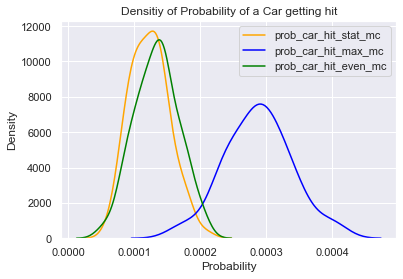

In [43]:

sns.distplot(sim_result.prob_car_hit_stat_mc, hist=False, color='orange', label='prob_car_hit_stat_mc')
sns.distplot(sim_result.prob_car_hit_max_mc, hist=False, color='blue', label='prob_car_hit_max_mc')
sns.distplot(sim_result.prob_car_hit_even_mc, hist=False, color='green', label='prob_car_hit_even_mc')
car_per_hour
plt.title('Densitiy of Probability of a Car getting hit')
plt.xlabel('Probability')
plt.ylabel('Density');
plt.show()

**Lesebeschrieb**: Die Grafik zeigt die Verteilungen der Wahrscheinlichkeit dass ein Fahrzeug von einem Steinschlag getroffen wird. Die orange Linie zeigt die Verteilung eines Treffers wenn der Verkehr statistisch verteilt ist. Die grüne Linie zeigt die Wahrscheinlichkeit eines Treffers wenn der Verkehr uniform Verteilt ist. Bei konstantem Maximalem Verkehrsaufkommen ist die Wahrscheinlichkeitsverteilung um einiges höher (blaue Linie).

##### 7.1.3  Konvergenz der Wahrscheinlichkeit während der Simulation
Es ist wichtig zu wissen, ob die Monte-Carlo-Simulation auf einen bestimmten Wert konvergiert. Die folgende Grafik zeigt, wie sich die Wahrscheinlichkeit nach etwa 500000 simulierten Jahren auf etwa 0,017 oder 1,7% einpendelt das ein Steinschlag durch das Netz bricht.

Text(0, 0.5, 'Probability')

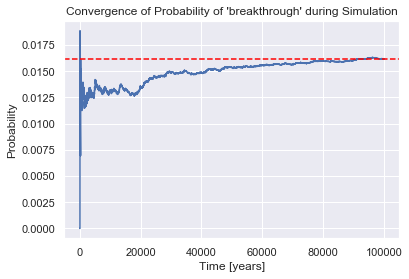

In [44]:


g = sns.lineplot(x=pro_counter.current_year, y=pro_counter.yearly_prob_rock_through_net_mc)


g.axhline(0.0162, ls='--', color = 'red')
plt.title('Convergence of Probability of \'breakthrough\' during Simulation')
plt.xlabel('Time [years]')
plt.ylabel('Probability')

**Lesebeschrieb**: Die Grafik (oberhalb) zeigt wie sich die berechnete Wahrscheinlichkeit der Monte-Carlo Simulation im Verlauf der simulation einpendelt. Der Wert konvergiert zu ca. 0.017, oder 1.7%. Die rote Linie beschreibt die berechnete Wahrscheinlichkeit eines Durchbruches (0.0162 oder 1.62 %).

# Kommunikation an die Bevölkerung
Die Simulation von einer Million Jahre ergab, dass wir eine Wahrscheinlichkeit eines Todesfalles von **0.000115** also 0.0115% haben. Liegen wir über dem Wert **0.0001** muss die Strasse laut den Vorgaben geschlossen werden. Wir liegen zwar nur knapp darüber, müssen allerdings dieser Vorgabe folge leisten. Im nächsten Schritt versuche ich zu ermitteln in welcher Form die Bevölkerung von der Entscheidung der Strassensperrung informiert werden sollte. Ziel ist es möglichst adressatengerecht zu kommunizieren und sich der Zielgruppe in der Form der Kommunikation anzupassen.

### 8.1 Altersverteilung in Graubünden:
Daten des Bundesamts für Statistik aus der Tabelle 'Ständige Wohnbevölkerung nach Altersklasse und Altersmasszahlen nach Kanton, am 31.12.2018' [Link zur Statistik](https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/stand-entwicklung/alter-zivilstand-staatsangehoerigkeit.assetdetail.9486012.html)

| Alter | Anzahl |
| --- | --- | 
| Total | 198.379 |
| 0-19 | 35678 |
| 20-39 | 48731 |
| 40-64 | 71655 |
| 65-79 | 30999 |
| 80+ | 11307 |
   
        
Laut SBB Fahrplan fahren keine Busse durch Schiers. Da die Sperrung eine Strasse in Schiers betrifft fällt die Altersgruppe unter 18 Jahren (0-19 Jahre) weg. Da sich die Mehrheit der Graubündner Bevölkerung im Alter von 40-64 Jahren befindet wird das unsere Zielgruppe sein. Das bedeutet dass wir unsere Kommunikation auf diese Personen ausrichten werden. Trotzdem werden alle Bürger der direkt betroffenen Orte mit einem Flyer benachrichtigt.

### 8.2 Visualisierungskonzept
Es wurde entschieden die Bevölkerung in Form eines Flyers zu informieren. Dieser Flyer soll alle notwendigen Informationen über die Gründe der Strassensperrung beinhalten und auf eine Website verweisen welche zusätlich Informationen enthält. 

Das Viualisierungskonzept wurde ausserhalb des Notebooks erarbeitet und ist im Abgabe-Ordner ersichtlich.

# Schlussfolgerung
Indem wir die Wahrscheinlichkeit eines Steinschlags mit tödlichen Folgen berechnen und auch 10 Millionen Jahre simulieren, um die Wahrscheinlichkeit zu erhalten, dass ein Auto ebenfalls von einem Stein getroffen wird, können wir feststellen, dass die Wahrscheinlichkeit eines Todes zu hoch ist. Die Wahrscheinlichkeit liegt in allen Fällen (berechnet und simuliert) über dem vorgegebenen Referenzwert von 1,e-04. Aus diesem Grund empfehlen wir, die Hauptstraße in Schiers bis zum vollständigen Austausch der Sicherheitsnetze zu sperren, die Bevölkerung über die Entscheidung zu informieren und die Ergebnisse des Notebooks zu veröffentlichen.

# Disclaimer
Die Bearbeitung der Challenge wurde grundsätzlich in einem R Notebook durchgeführt, da unserer Meinung nach dies die am besten geeignete Sprache für die Aufgabe ist. Um allerdings den Vorgaben zur Erhaltung von Portfoliocredits gerecht zu werden, habe ich dieses Notebook in Python erstellt. Dieses Notebook enthält somit die wichtigsten Teile der Arbeit (Darunter die Monte-Carlo-Simulation) in Python-Code. Weitere Berechnungen wie das Prüfen der besten Verteilung auf die Datensets sind im R-Notebook vorhanden. 